In [141]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [142]:
# laod the data
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [143]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [144]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [145]:
# label encoding the data
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_label = data.copy()
data_label['sex'] = label_encoder.fit_transform(data_label['sex'])
data_label['smoker'] = label_encoder.fit_transform(data_label['smoker'])
data_label['region'] = label_encoder.fit_transform(data_label['region'])

In [146]:
data_label

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


*Descriptive Statistics*


In [147]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [148]:
numerical_columns = data.select_dtypes(include=['number']).columns
numerical_columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

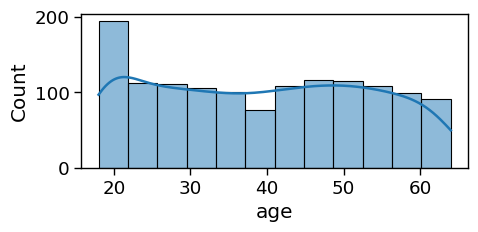

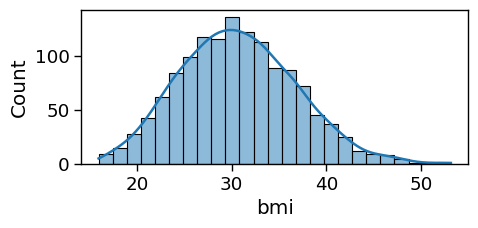

In [149]:
# visualize the distribution of the numerical columns
for cat in numerical_columns[:-1]:
    if(cat != "children"):
        sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 1.8})
        fig,ax = plt.subplots(figsize = (5,2))
        sns.histplot(data[cat],kde = True)

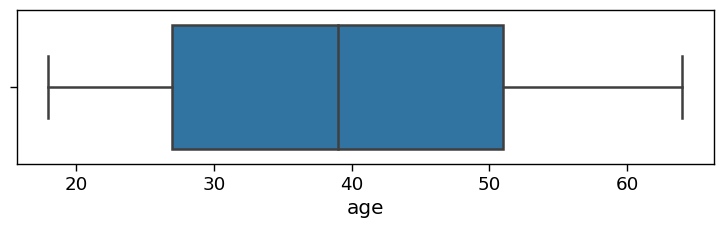

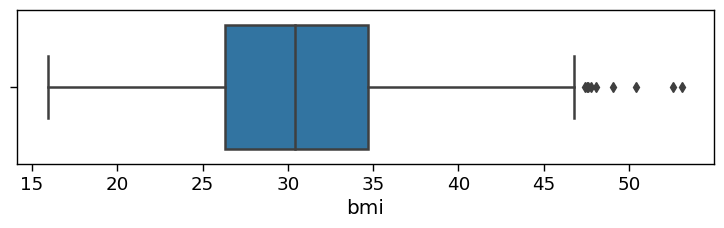

In [150]:
for cat in numerical_columns[:-1]:
    if(cat != "children"):
        fig,ax = plt.subplots(figsize = (9,2))
        color = np.random.rand(3,)
        ax = sns.boxplot(x=data[cat])

In [151]:
#correlation matrix
corr = data_label.corr(method = 'pearson')
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


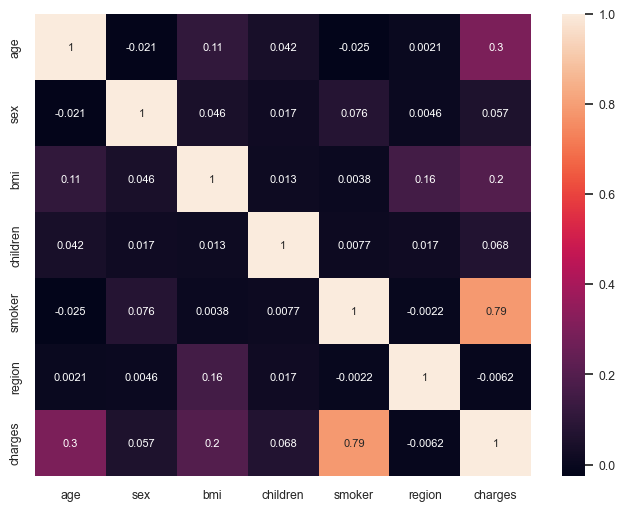

In [157]:
plt.figure(figsize=(8, 6))
sns.set(font_scale=0.8)
sns.heatmap(corr,xticklabels = corr.columns,yticklabels = corr.columns,annot = True,annot_kws={"size": 8})
plt.show()

In [158]:
# Removing outliers
def remove_outliers(df):
    outliers = {}
    for col in df.columns:
        if str(df[col].dtype) != 'object':
            df = df[np.abs(df[col]-df[col].mean()) < (3*df[col].std())]
            olrs = df[~(np.abs(df[col]-df[col].mean()) < (3*df[col].std()))]
            outliers = pd.DataFrame(olrs)        
    return df            
data_outlier = remove_outliers(data_label)

In [161]:
data_outlier

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


*Check the quantiles*


In [166]:
import scipy.stats as stats

def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.suptitle(variable, fontsize=16)
    plt.show()

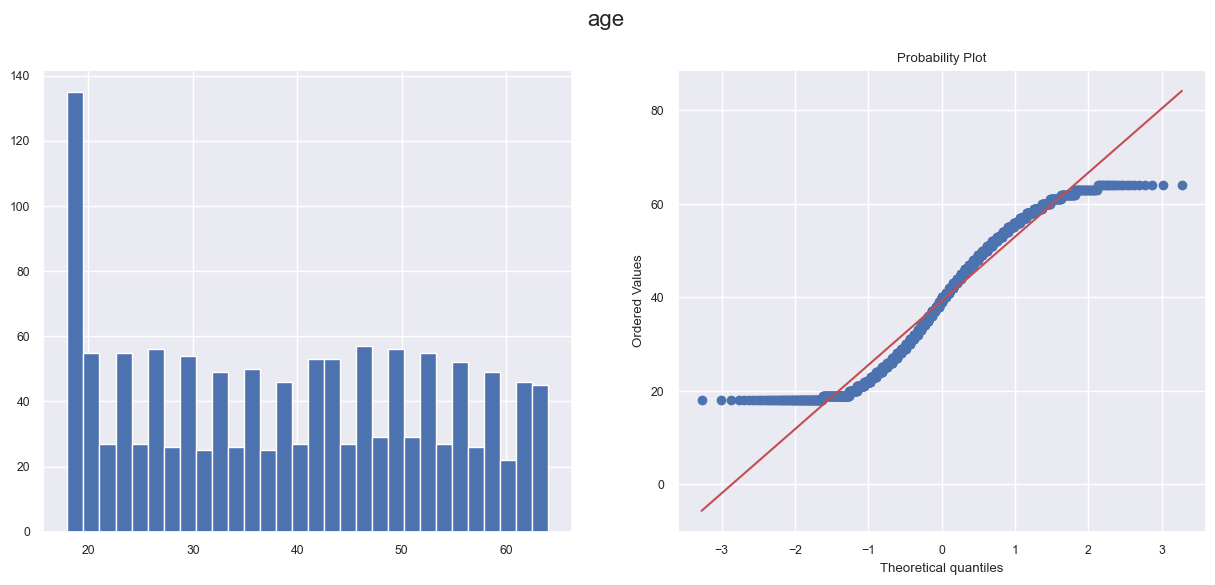

In [167]:
diagnostic_plots(data_outlier,"age")

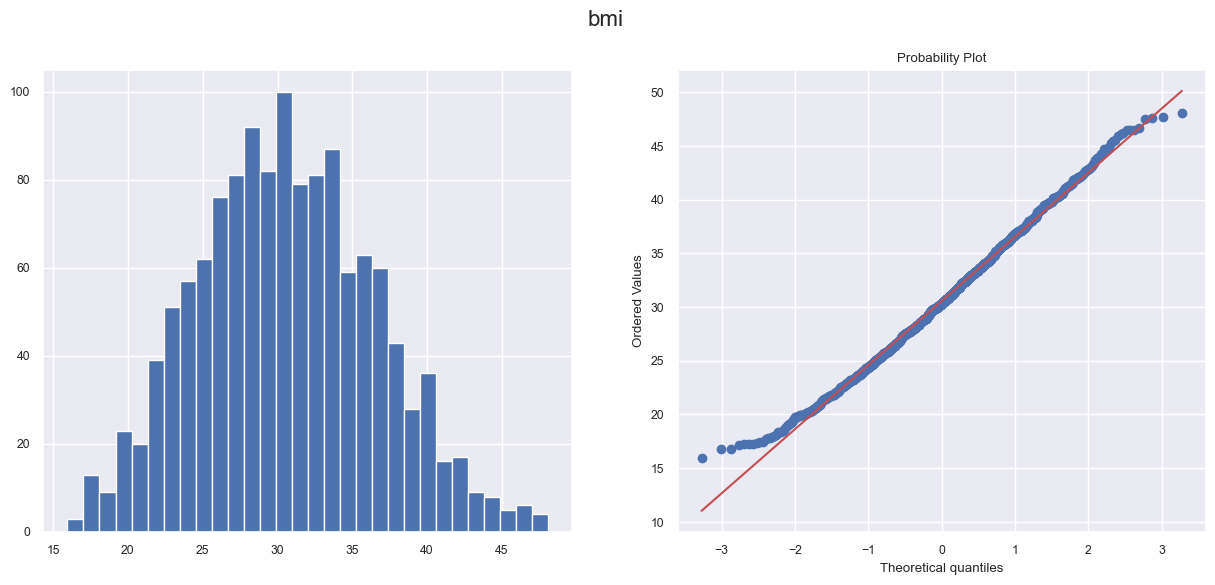

In [168]:
diagnostic_plots(data_outlier,"bmi")

In [169]:
# one hot encoding the categrical columns
data_hot = pd.get_dummies(data_outlier,columns=["sex","smoker","region"],dtype=int)
data_hot.tail()

,age,bmi,children,charges,sex_0,sex_1,smoker_0,smoker_1,region_0,region_1,region_2,region_3
1333,50,30.97,3,10600.5483,0,1,1,0,0,1,0,0
1334,18,31.92,0,2205.9808,1,0,1,0,1,0,0,0
1335,18,36.85,0,1629.8335,1,0,1,0,0,0,1,0
1336,21,25.80,0,2007.9450,1,0,1,0,0,0,0,1
1337,61,29.07,0,29141.3603,1,0,0,1,0,1,0,0


In [171]:
y = data_hot['charges']
#log transform target variable
y = np.log1p(y)

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data_hot.drop(['charges'],axis = 1), y, test_size=0.2, random_state=42)

*Standard Scaler*

In [175]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [211]:
# Model building
# set random seed
tf.random.set_seed(42)
model_one = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])
model_one.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.legacy.SGD(),metrics = ["mae"])
history = model_one.fit(X_train_std,y_train,epochs = 100,verbose = 0)

In [212]:
# Evaluate our larger model
model_one.evaluate(X_test_std, y_test)

9/9 [==============================] - 0s 406us/step - loss: 0.2325 - mae: 0.2325


[0.23245365917682648, 0.23245365917682648]

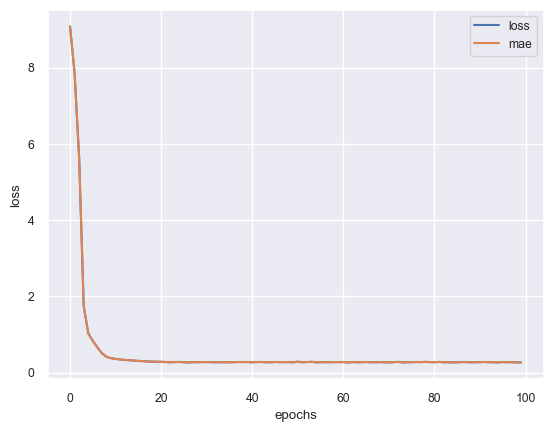

In [213]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [219]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
# Predict on the validation set
def print_evaluation_score(model):
    y_test_pred = model.predict(X_test_std)
    mae = mean_absolute_error(y_test, y_test_pred)
    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = r2_score(y_test, y_test_pred)
    print(f'R2 Score for {model}: {r2}')
    print(f'MAE Score for {model}: {mae}')    
    print(f'MSE Score for {model}: {mse}')    
    print(f'RMSE Score for {model}: {rmse}')        

In [237]:
def plot_eval(Model):
    test_pred = Model.predict(X_test_std)
    fig,ax = plt.subplots(figsize = (6,4))
    plt.scatter(y_test, test_pred, c='#0097e3',s = 6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2.7)
    plt.xlabel('Actuals')
    plt.ylabel('Predicted Values')
    plt.title('Actuals Vs Predicted Values')
    plt.suptitle(Model,fontsize = 12)
    plt.show()

In [238]:
print_evaluation_score(model_one)

9/9 [==============================] - 0s 478us/step
R2 Score for <keras.engine.sequential.Sequential object at 0x29034fdd0>: 0.8041558737440232
MAE Score for <keras.engine.sequential.Sequential object at 0x29034fdd0>: 0.2324536377003091
MSE Score for <keras.engine.sequential.Sequential object at 0x29034fdd0>: 0.16223014279166306
RMSE Score for <keras.engine.sequential.Sequential object at 0x29034fdd0>: 0.40277803166466647


9/9 [==============================] - 0s 460us/step


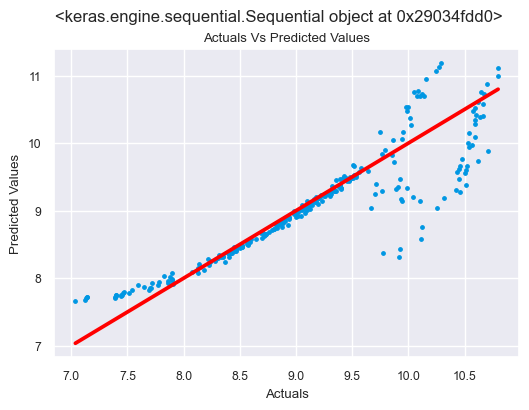

In [239]:
plot_eval(model_one)

In [216]:
# Model building
# set random seed
tf.random.set_seed(42)
model_two = tf.keras.Sequential([
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(1)
])
model_two.compile(loss = tf.keras.losses.mae,optimizer = tf.keras.optimizers.legacy.Adam(),metrics = ["mae"])
history = model_two.fit(X_train_std,y_train,epochs = 100,verbose = 0)

9/9 [==============================] - 0s 388us/step - loss: 0.1186 - mae: 0.1186


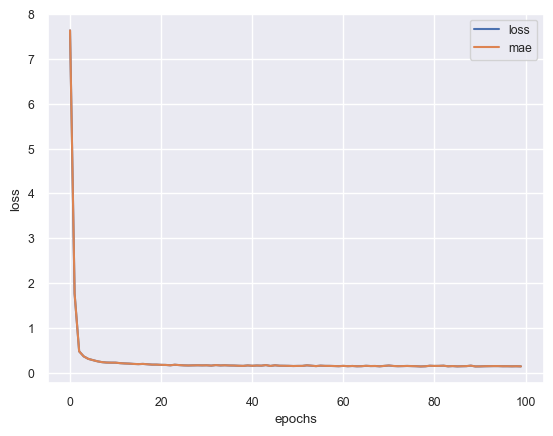

In [217]:
# Evaluate our larger model
model_two.evaluate(X_test_std, y_test)
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [221]:
print_evaluation_score(model_two)

9/9 [==============================] - 0s 534us/step
R2 Score for <keras.engine.sequential.Sequential object at 0x290318750>: 0.9043290197751668
MAE Score for <keras.engine.sequential.Sequential object at 0x290318750>: 0.11859941276789387
MSE Score for <keras.engine.sequential.Sequential object at 0x290318750>: 0.0792503562889949
RMSE Score for <keras.engine.sequential.Sequential object at 0x290318750>: 0.28151439801366274


9/9 [==============================] - 0s 477us/step


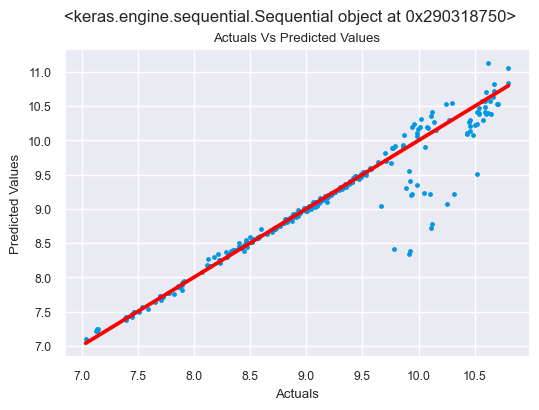

In [240]:
plot_eval(model_two)